In [10]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [11]:
df =pd.read_csv('beacons.csv')
df.shape

(1916, 10)

In [12]:
X =  df.iloc[:1700,3:]
y =   df.iloc[:1700,1:3]
X1 =  df.iloc[1700:,3:]
y1 =   df.iloc[1700:,1:3]

In [13]:
y

,x,y
0,5.0,6.5
1,5.0,6.6
2,5.0,6.7
3,5.0,6.8
4,5.0,6.9
...,...,...
1695,5.4,11.0
1696,5.4,10.8
1697,5.4,10.6
1698,5.4,10.4


In [14]:
regressor = GradientBoostingRegressor(
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
regressor.fit(X, y['x'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
regressor1 = GradientBoostingRegressor(
    max_depth=10,
    n_estimators=1000,
    learning_rate=1.0
)
regressor1.fit(X, y['y'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
predictions = regressor.predict(X1)
prediction= regressor1.predict(X1)

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'a'})
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'b'})

y1 =y1.reset_index()
y1['a'] = predictions['a']
y1['b'] = prediction['b']

y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
y1['distance'].mean()

4.319920764130634

In [19]:
y1

,level_0,index,x,y,a,b,distance
0,0,1700,5.4,10.0,-1.150351,8.314044,6.763841
1,1,1701,5.4,9.8,5.399999,10.200000,0.400000
2,2,1702,5.4,9.6,0.850715,9.988342,4.565830
3,3,1703,5.4,9.4,6.150521,7.678501,1.877988
4,4,1704,5.4,9.2,3.726378,8.239071,1.929869
...,...,...,...,...,...,...,...
211,211,1911,2.6,2.6,6.632447,2.411007,4.036874
212,212,1912,2.4,2.6,3.917227,2.753219,1.524944
213,213,1913,2.2,2.6,0.649452,9.026695,6.611097
214,214,1914,2.0,2.6,4.030040,1.726009,2.210186


In [21]:
from sklearn.model_selection import KFold 
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    regressor = GradientBoostingRegressor(max_depth=10,n_estimators=1000,learning_rate=1.0)
    regressor.fit(X, y['x'])
    regressor1 = GradientBoostingRegressor(max_depth=10,n_estimators=1000,learning_rate=1.0)
    regressor1.fit(X, y['y'])
    predictions = regressor.predict(X1)
    prediction= regressor1.predict(X1)

    predictions = pd.DataFrame(predictions)
    predictions = predictions.rename(columns={0:'a'})
    prediction = pd.DataFrame(prediction)
    prediction = prediction.rename(columns={0:'b'})
    y1['a'] = predictions['a']
    y1['b'] = prediction['b']

    y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
    mean= y1['distance'].mean()
    scores.append(mean)

C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 170  171  172 ... 1697 1698 1699] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169]
Train Index:  [   0    1    2 ... 1697 1698 1699] 

Test Index:  [170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 

In [22]:
mean

4.349326424344342

In [23]:
scores

[4.332811808972841,
 4.267624738823643,
 4.374946330833148,
 4.5225872888477125,
 4.354922429743405,
 4.33664024868574,
 4.2819922639493075,
 4.25189893282837,
 4.487137738394963,
 4.349326424344342]

Text(0.5,0,'Gradient Boosting')

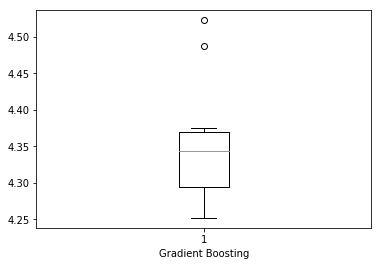

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(scores)
plt.xlabel('Gradient Boosting')